### Importing the libraries.

In [3]:
#import the warnings.

import warnings
warnings.filterwarnings("ignore")

In [4]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

###  Data Cleaning 

#### Read in the Data set. 

In [6]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv(r"C:\Users\HP\Desktop\Pooja DA\datasets\bank_marketing_updated_v1.csv")
inp0

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [7]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [9]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv(r"C:\Users\HP\Desktop\Pooja DA\datasets\bank_marketing_updated_v1.csv",  skiprows=2)
inp0


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [10]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [11]:
#print the information of variables to check their data types.
inp0.info

<bound method DataFrame.info of        customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing 

#### Dropping customer id column. 

In [12]:
#drop the customer id as it is of no use.
#When inplace = True is used, it performs the operation on dataframe and nothing is returned.
#When inplace=False is used, it performs the operation on dataframe and returns a new copy of data.  
inp0.drop("customerid", axis=1, inplace= True)     
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [13]:

#Extract job in newly created 'job' column from "jobedu" column.
inp0["job"]= inp0["jobedu"].apply(lambda x:x.split(",")[0])  #[0] is 1st element from jobedu
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar


In [14]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0["jobedu"].apply(lambda x:x.split(",")[1]) ##[1] is 2nd ment from jobedu
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [15]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu", axis=1, inplace= True)     
inp0

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Impute/Remove missing values 

In [16]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [17]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [18]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)   #small number

0.04423702196368141

Drop the records with age missing. 

In [19]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()].copy() 
inp1

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [20]:
inp1.age.isnull().sum()  #now check the missing values in age

0

#### handling missing values in month column

In [21]:
inp1['months']= inp1["month"].apply(lambda x:x.split(",")[0])
inp1

#shows that it cannot be split as there are some float values

AttributeError: 'float' object has no attribute 'split'

In [22]:

#check the float values in month, shows the records whicha has float
inp1[inp1.month.apply(lambda x: isinstance(x,float))==True]  

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [23]:
#count the missing values in month column in inp1.
inp1.isnull().sum()
inp1.month.isnull().sum()


50

In [24]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45191 non-null  int64  
 2   balance    45191 non-null  int64  
 3   marital    45191 non-null  object 
 4   targeted   45191 non-null  object 
 5   default    45191 non-null  object 
 6   housing    45191 non-null  object 
 7   loan       45191 non-null  object 
 8   contact    45191 non-null  object 
 9   day        45191 non-null  int64  
 10  month      45141 non-null  object 
 11  duration   45191 non-null  object 
 12  campaign   45191 non-null  int64  
 13  pdays      45191 non-null  int64  
 14  previous   45191 non-null  int64  
 15  poutcome   45191 non-null  object 
 16  response   45161 non-null  object 
 17  job        45191 non-null  object 
 18  education  45191 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [25]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts()

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [26]:
inp1.month.value_counts(normalize=True)  #return in percent format

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [27]:
#find the mode of month in inp1
#estimate by using the most popular month 
#estimating what could have been the case

month_mode = inp1.month.mode()[0]   #mode of the 1st element in  month column
month_mode

'may, 2017'

In [28]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)  #Fill NA/NaN values using the above method mode, replace the missing values
inp1.month.value_counts(normalize=True)    #filled with some in may,2017 value

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [29]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [30]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [31]:
inp1.shape

(45191, 19)

In [32]:
#calculate the percentage of missing values in response column. 
float(100.0*30/45191)

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

The response column has no associations with any other features in the data set. This may be because there is some entry-level error in the data set or there can be some other reasons where the bank does not come to any conclusion regarding whether this particular customer is agreeing or not to invest in term deposits, which obviously has no relation with any other variables in the data set.

In [33]:
#drop the records with response missings in inp1.
#They can be removed because they are very small in number as compared to entries in the dataset.
inp1= inp1[~inp1.age.isnull()].copy()
inp1

# inp1.drop("", axis=1, inplace= True)     
# inp0

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [34]:
#calculate the missing values in each column of data frame: inp1.
inp1.response.isnull().sum()

30

#### handling pdays column. 

In [35]:
#describe the pdays column of inp1.
inp1.pdays.describe()
#inp1.pdays.value_counts()
# -1 is encoding , people who have been not conatcting , subjecting to not older campaign 

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.




In [36]:
#describe the pdays column with considering the -1 values.

inp1.loc[inp1.pdays<0, "pdays"] = np.NaN  #replace it with nan 
inp1.pdays.describe()

#missing values doesnt have to be present as null values

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [37]:
#describe the age variable in inp1.
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

(array([ 1336., 11743., 12919.,  8011.,  7061.,  3311.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

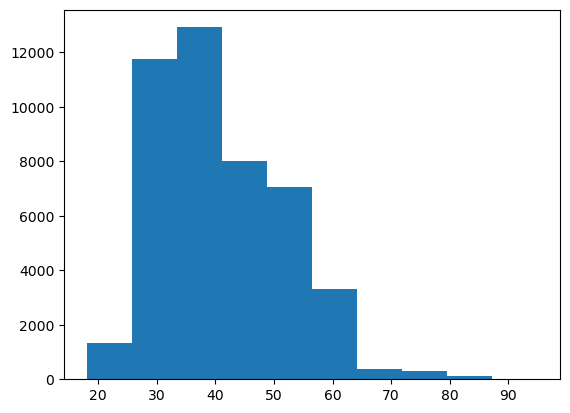

In [38]:
#plot the histogram of age variable.

plt.hist(inp1['age'])

<AxesSubplot:xlabel='age'>

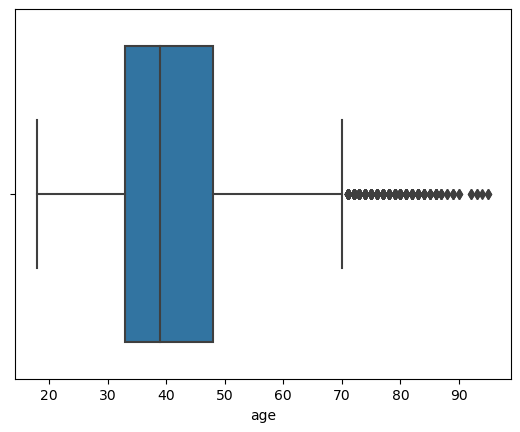

In [39]:
#plot the boxplot of age variable.
sns.boxplot(inp1['age'])

## normal values of age because any person can be over 70 or 80 years of age. 
#Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, 
#which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

#### Salary variable 

In [40]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

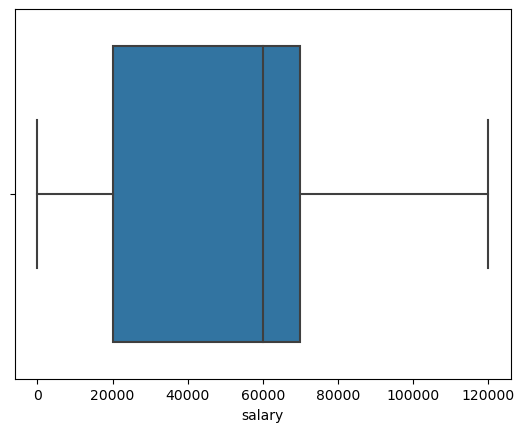

In [41]:
#plot the boxplot of salary variable.
sns.boxplot(inp1['salary'])

#no outliers here

In [42]:
inp1.salary.quantile([0.5, 0.7, 0.75, 0.9, 0.95, 0.99])

0.50     60000.0
0.70     70000.0
0.75     70000.0
0.90    100000.0
0.95    100000.0
0.99    120000.0
Name: salary, dtype: float64

In [43]:
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [44]:
# for better understanding of outliers

dat = [1,2,3,4,5,6,7,8,9,10]
df=pd.DataFrame(data=dat)
df.describe()

,0
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


#### Balance variable 

In [45]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance'>

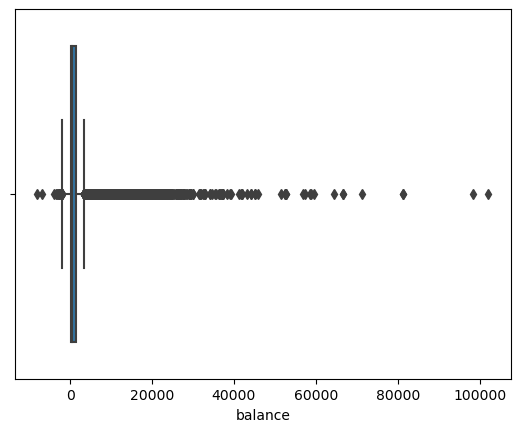

In [46]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x666a905310>,
 'caps': [<matplotlib.lines.Line2D at 0x666a9058b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x666a905040>],
 'medians': [<matplotlib.lines.Line2D at 0x666a905e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x666a912190>],
 'means': []}

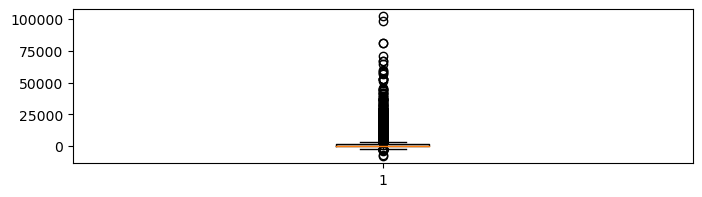

In [47]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,2])
plt.boxplot(inp1.balance)

In [48]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.2, 0.5, 0.7, 0.75, 0.9, 0.95, 0.99])

0.20       22.0
0.50      448.0
0.70     1126.0
0.75     1428.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [49]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


instead of looking at mean, we could at quantiles/medians/percentiles instead
Sometimes, it is beneficial if you look into the quantiles instead of the box plot, mean or median. Quantile may give you a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.

### Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

The 'duration' variable is basically an object type variable. But it has to be numeric type. There are data in the 'duration' variable in two formats, seconds and minutes. You need to convert it into a single scale, either in seconds or minutes.

In [47]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [48]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.

inp1.duration.apply(lambda x:x.split()[0])

0                     261
1                     151
2                      76
3                      92
4                     198
               ...       
45206    16.2833333333333
45207                 7.6
45208    18.7833333333333
45209    8.46666666666667
45210    6.01666666666667
Name: duration, Length: 45191, dtype: object

In [49]:
#The duration variable has data in minutes as well as in seconds, which has to be converted into minute only.


inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))
#                    function                   convert into minute     find second entries in dataset 

 

In [50]:
#describe the duration variable
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Univariate Analysis 

###  Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [50]:
#calculate the percentage of each marital status category. 
inp1.dtypes
inp1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

<AxesSubplot:>

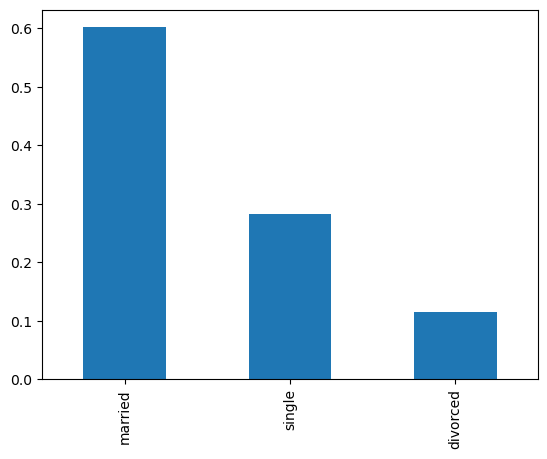

In [51]:
#plot the bar graph of percentage marital status categories

inp1.marital.value_counts(normalize=True).plot.bar()

#### Job  

In [52]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

<AxesSubplot:>

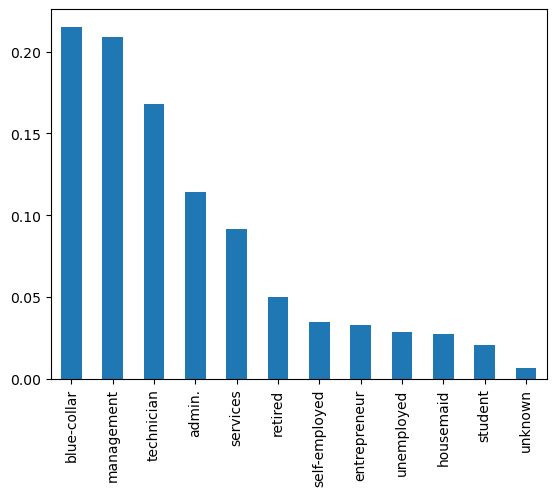

In [53]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.bar()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [54]:
#calculate the percentage of each education category.

inp1.education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

<AxesSubplot:ylabel='education'>

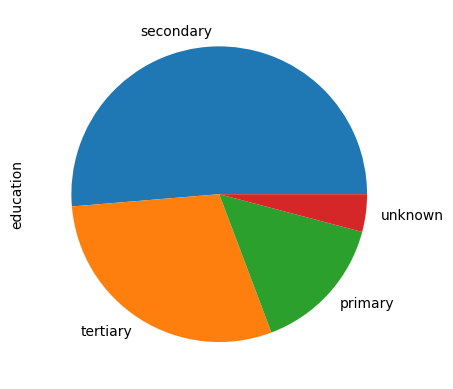

In [55]:
#plot the pie chart of education categories
#calculate the percentage of each education category.

inp1.education.value_counts(normalize=True).plot.pie()

#### poutcome 

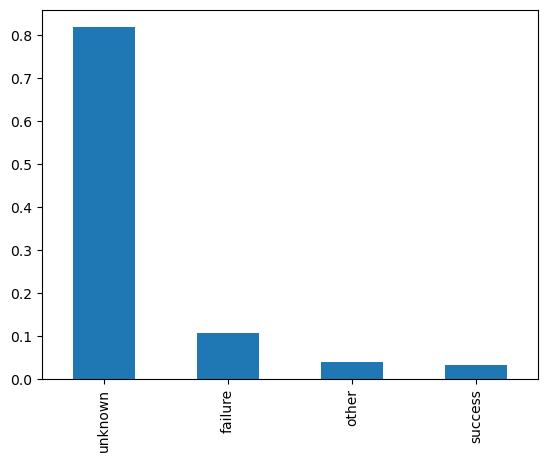

In [56]:
#calculate the percentage of each poutcome category.

inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

<AxesSubplot:>

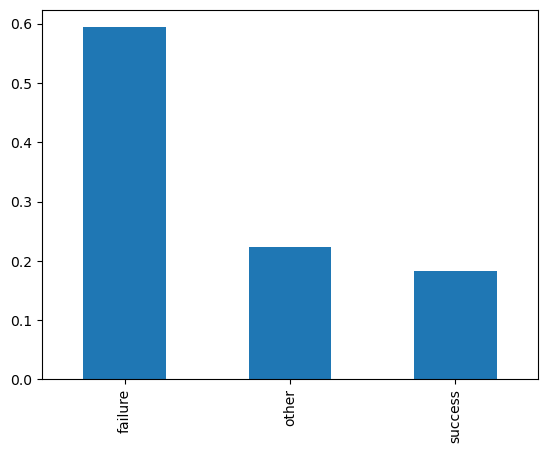

In [57]:
#removing unknown to have more clarity

inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()


#### Response the target variable 

In [58]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

<AxesSubplot:ylabel='response'>

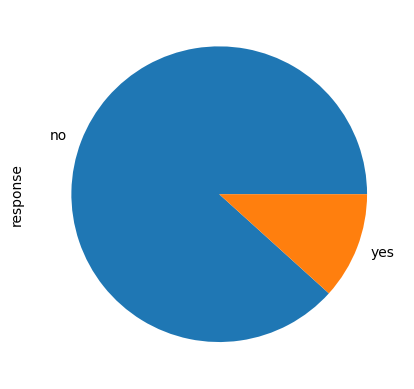

In [59]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()

## Bivariate and Multivariate Analysis

### Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

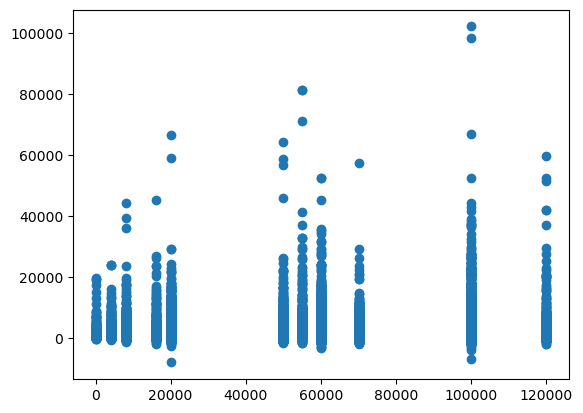

In [60]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)

<AxesSubplot:xlabel='age', ylabel='balance'>

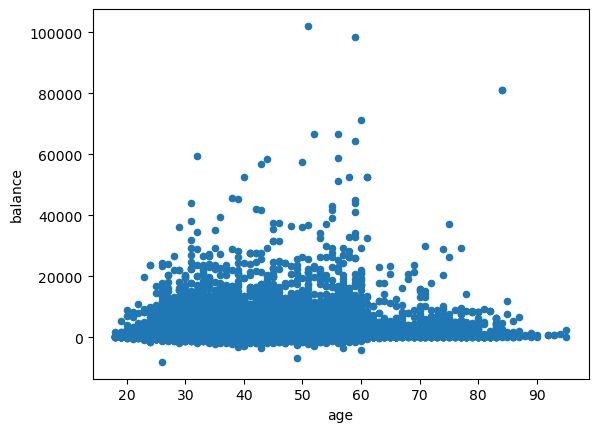

In [61]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x="age", y="balance")

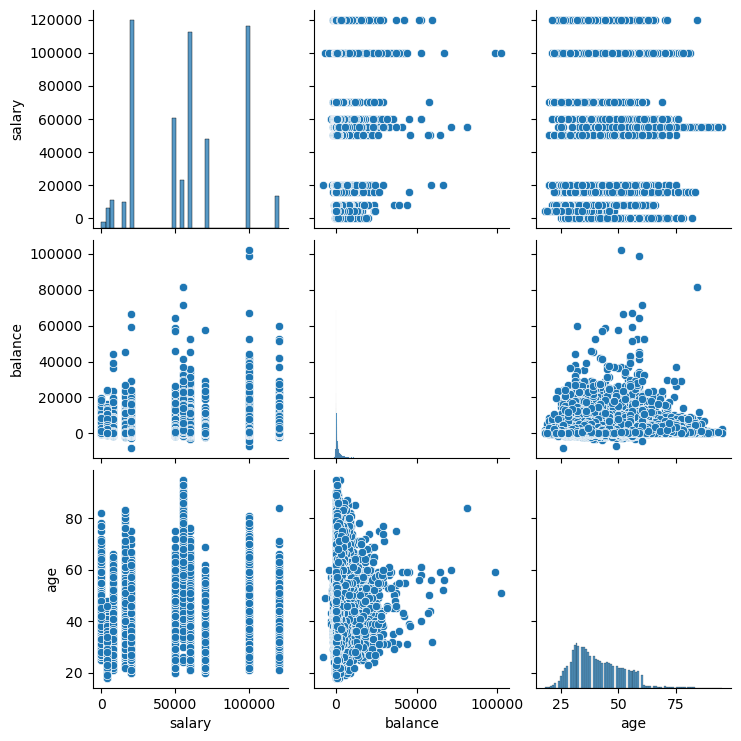

In [62]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data= inp1, vars=["salary", "balance" , "age"])

#### Correlation heat map 

In [63]:
#quantify using correlation
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[[ "salary", "balance","age"]]

,salary,balance,age
0,100000,2143,58.0
1,60000,29,44.0
2,120000,2,33.0
3,20000,1506,47.0
4,0,1,33.0
...,...,...,...
45206,60000,825,51.0
45207,55000,1729,71.0
45208,55000,5715,72.0
45209,20000,668,57.0


<AxesSubplot:>

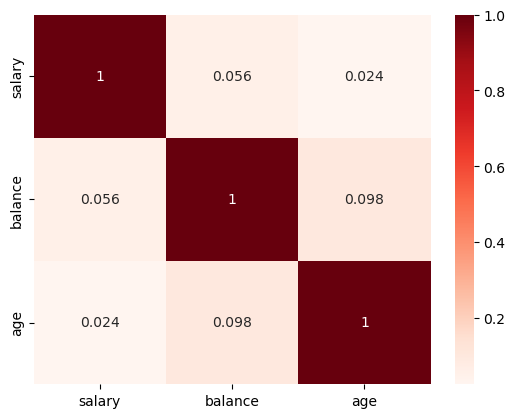

In [64]:
#Correlation heat map
sns.heatmap(inp1[[ "salary", "balance","age"]].corr(), annot=True, cmap="Reds")

### Numerical categorical variable

#### Salary vs response 

In [65]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby(['response'])['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [66]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby(['response'])['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='response', ylabel='salary'>

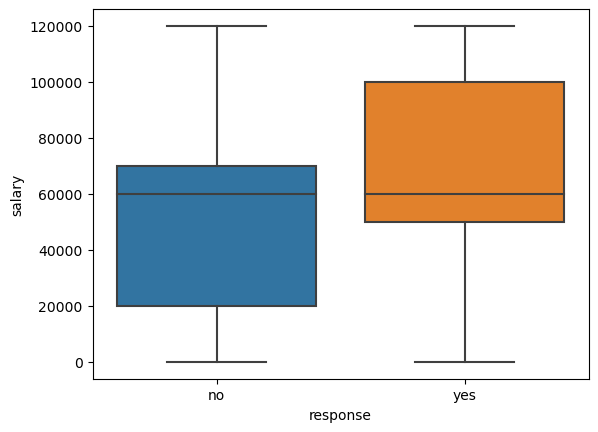

In [67]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x="response", y="salary")

#However, a very different picture emerges when you plot a boxplot.
#The interquartile range for customers who gave a positive response is on the higher salary side. 
#This is actually true, because people who have higher salaries are more likely to invest in term deposits.

 

#### Balance vs response 

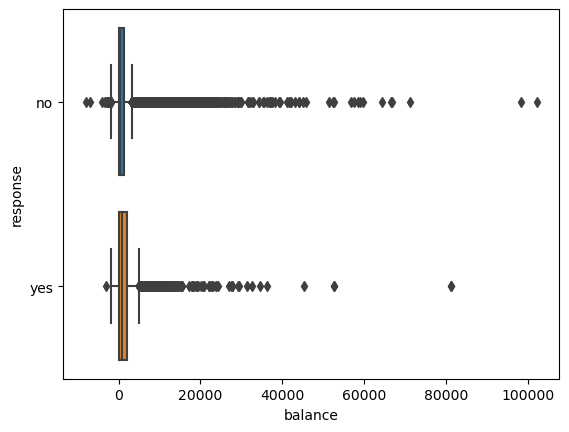

In [68]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, x="balance", y="response")
plt.show()

In [69]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby(['response'])['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [70]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby(['response'])['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [71]:
#function to find the 75th percentile.

def p75(x):
    return np.quantile(x, 0.75)

In [72]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby(["response"])["balance"].aggregate(['mean', 'median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<AxesSubplot:xlabel='response'>

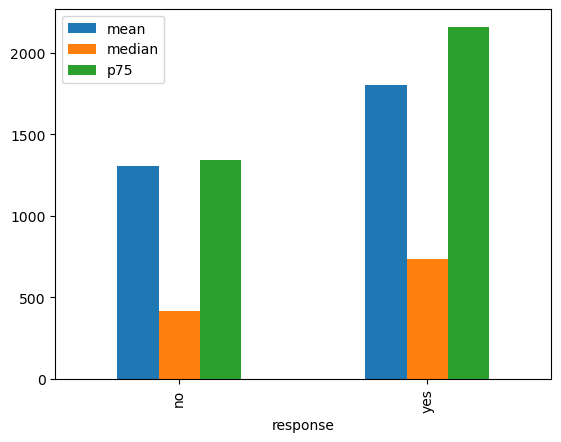

In [73]:
#plot the bar graph of balance's mean an median with response.


inp1.groupby(["response"])["balance"].aggregate(['mean', 'median',p75]).plot.bar()

#### Education vs salary 

In [74]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education')['salary'].mean()

education
primary      34224.510663
secondary    49736.127280
tertiary     82878.300113
unknown      46558.427571
Name: salary, dtype: float64

In [75]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

the entrepreneur and management job categories emerge as the highest-paying jobs. The management job category is directly related to a higher education level, and hence, a higher salary is expected for such a job category. The lowest salary group is student, which is again true because they are not employed yet.

In [76]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Categorical categorical variable 

In [77]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0

inp1['response_flag'] = np.where(inp1.response=='yes', 1, 0)

In [78]:
inp1['response_flag'].value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [79]:
inp1['response'].value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [80]:
inp1['response_flag'].value_counts(normalize=True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [81]:
inp1['response_flag'].mean()

0.11694806488017526

#### Education vs response rate

In [82]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [83]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='marital'>

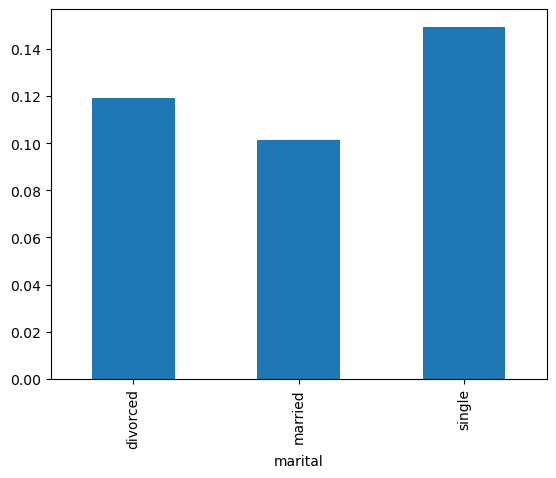

In [84]:
#plot the bar graph of marital status with average value of response_flag

inp1.groupby(["marital"])["response_flag"].mean().plot.bar()

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

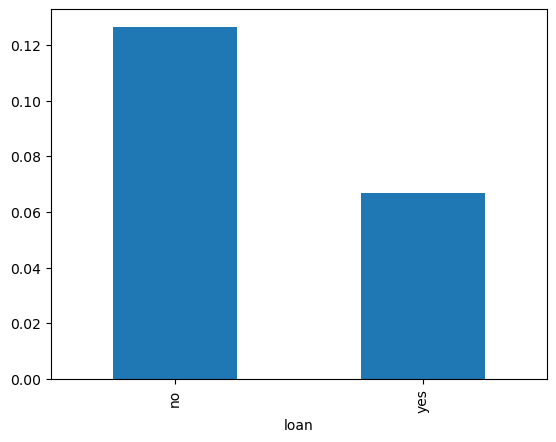

In [85]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(["loan"])["response_flag"].mean().plot.bar()

#### Housing loans vs response rate 

<AxesSubplot:xlabel='housing'>

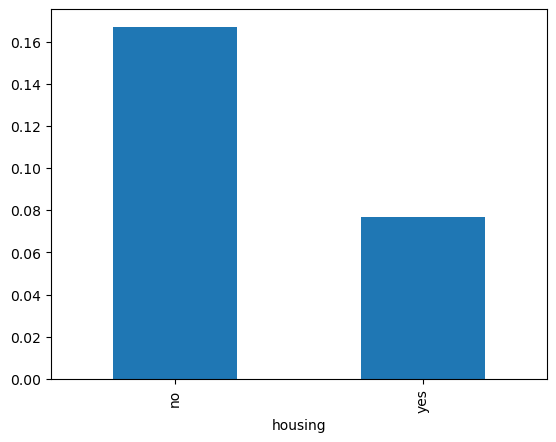

In [86]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(["housing"])["response_flag"].mean().plot.bar()

 people who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank. This is true, probably because people who have already availed loans may not have the necessary funds to invest in a term deposit.

 

#### Age vs response 

<AxesSubplot:xlabel='response', ylabel='age'>

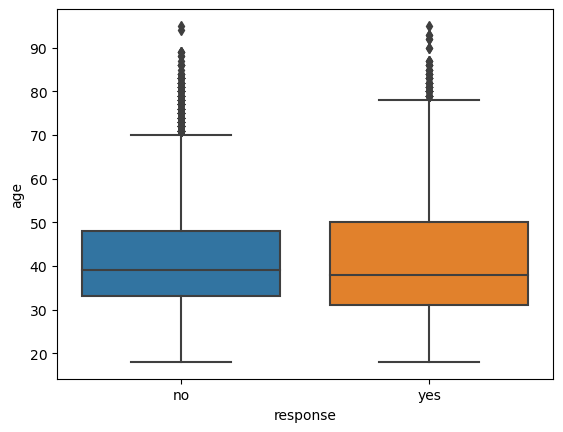

In [87]:
#plot the boxplot of age with response_flag

sns.boxplot(data=inp1, x="response", y="age")


##### making buckets from age columns 

In [88]:
#create the buckets of <30, 30-40, 40-50, 50-60 and 60+ from age column.

inp1["age_group"] = pd.cut(inp1.age, [0,30,40,50,60,9999], labels=["<30", "30-40", "40-50", "50-60" ,"60+"])
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,92 sec,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,198 sec,1,NaN,0,unknown,no,unknown,unknown,0,30-40


In [89]:
inp1["age_group"].value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_group, dtype: float64

<AxesSubplot:xlabel='age_group'>

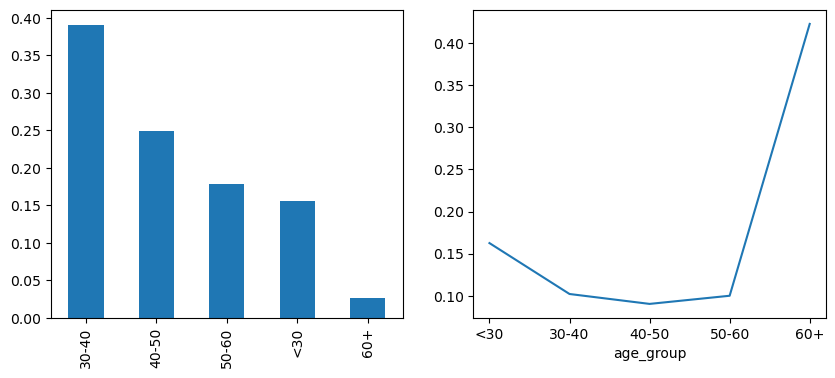

In [90]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.

plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
inp1["age_group"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
inp1.groupby(["age_group"])['response_flag'].mean().plot()


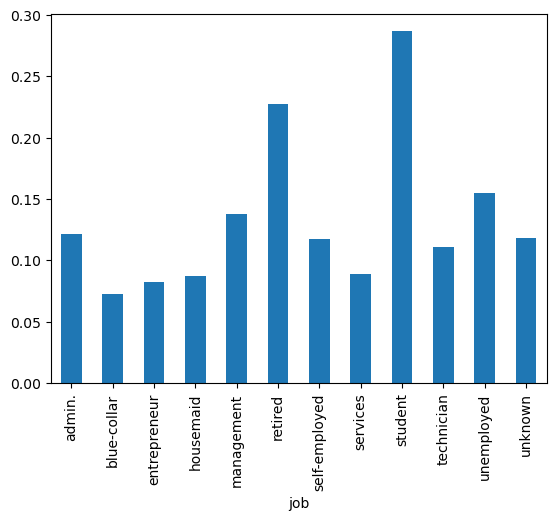

In [91]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby('job')[('response_flag')].mean().plot.bar()
plt.show()



### Multivariate analysis 

#### Education vs marital vs response 

<AxesSubplot:xlabel='marital', ylabel='education'>

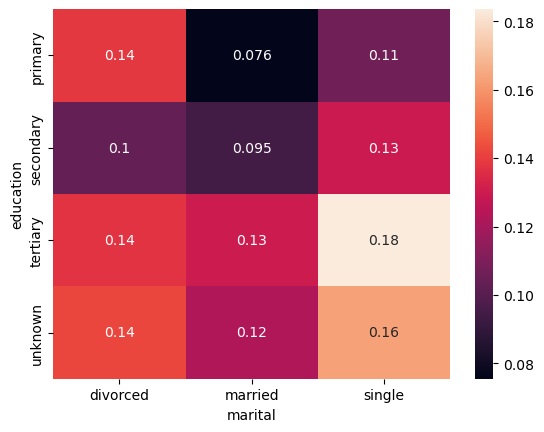

In [92]:
#create heat map of education vs marital vs response_flag

res = pd.pivot_table(data=inp1, index="education", columns='marital', values="response_flag")
res

sns.heatmap(res, annot=True)

<AxesSubplot:xlabel='marital', ylabel='education'>

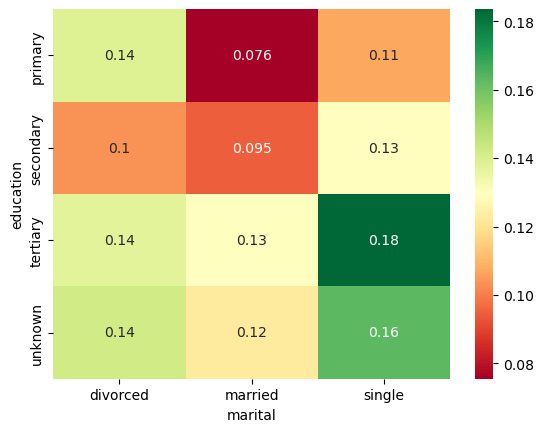

In [93]:
sns.heatmap(res, annot=True, cmap="RdYlGn")

#### Job vs marital vs response 

<AxesSubplot:xlabel='marital', ylabel='job'>

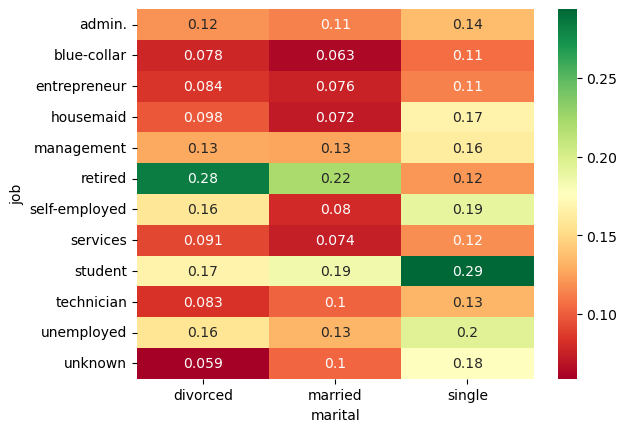

In [94]:
#create the heat map of Job vs marital vs response_flag.
res1 = pd.pivot_table(data=inp1, index="job", columns='marital', values="response_flag")
res1

sns.heatmap(res1, annot=True , cmap="RdYlGn")

#### Education vs poutcome vs response

In [ ]:
#create the heat map of education vs poutcome vs response_flag.

res2 = pd.pivot_table(data=inp1, index="education", columns='poutcome', values="response_flag")
res2

sns.heatmap(res2, annot=True , cmap=="RdYlGn")


In [96]:
inp1[inp1.pdays>0].response_flag.mean()

0.23061076102762967

<AxesSubplot:xlabel='poutcome', ylabel='education'>

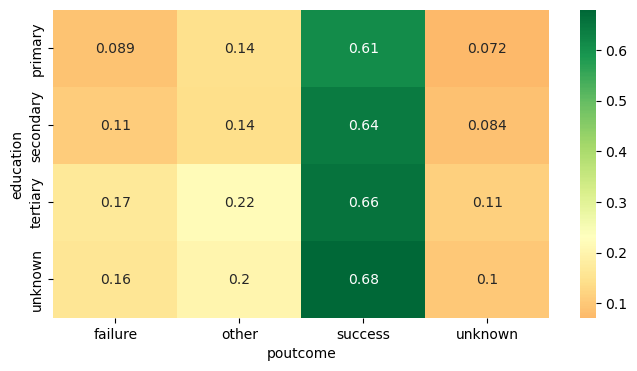

In [97]:
plt.figure(figsize=[8,4])

res2 = pd.pivot_table(data=inp1, index="education", columns='poutcome', values="response_flag")
res2

sns.heatmap(res2, annot=True , cmap="RdYlGn", center=0.2306)   #center is median value 

